In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, multilabel_confusion_matrix,confusion_matrix
import seaborn

In [2]:
%pip install kaggle
!kaggle datasets download uciml/iris
!unzip /content/iris.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 7.36MB/s]
Archive:  /content/iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


Импорт сэта Ирис - https://www.kaggle.com/datasets/uciml/iris

In [3]:
dataset = pd.read_csv("/content/Iris.csv")
print(dataset.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
dataset.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
dum = pd.get_dummies(dataset['Species'])
dum_data = pd.concat([dataset,dum],axis=1)
dum_data=dum_data.drop(columns='Species')
dum_data=dum_data.drop(columns='Id')
dum_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [6]:
x, y = dum_data.iloc[:,:4],dum_data.iloc[:,4:]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=42)
print(x_train.head())
print(y_train.head())
print(f"Совпадение сайзов трэйна {x_train.shape[0]==y_train.shape[0]}\nСовпадение сайзов теста {x_test.shape[0]==y_test.shape[0]}")

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
4              5.0           3.6            1.4           0.2
32             5.2           4.1            1.5           0.1
142            5.8           2.7            5.1           1.9
85             6.0           3.4            4.5           1.6
86             6.7           3.1            4.7           1.5
     Iris-setosa  Iris-versicolor  Iris-virginica
4           True            False           False
32          True            False           False
142        False            False            True
85         False             True           False
86         False             True           False
Совпадение сайзов трэйна True
Совпадение сайзов теста True


In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#Пусть будет 12 деревьев, а какчество будем измерять по энтропии
model = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 42)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=12, random_state=42)

In [10]:
y_test.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
73,False,True,False
18,True,False,False
118,False,False,True
78,False,True,False
76,False,True,False


In [11]:
y_pred = model.predict(x_test)
print(y_pred.shape)
print(y_test.shape)

(38, 3)
(38, 3)


In [12]:
accuracy = accuracy_score(y_test, y_pred)#точность покзывает насколько модель правильно классифицирует
recall = recall_score(y_test, y_pred, average='weighted') #низкая полнота может  быть из-за несбалансированных классов, где один класс имеет большее количество объектов, чем другой
precision = precision_score(y_test, y_pred, average='weighted')#доля истинно положительных объектов среди объектов, которые модель предсказала как положительные
f1 = f1_score(y_test, y_pred, average='weighted')#показывает как точность, так и полноту
y_pred_prob = model.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')#способность модели различать между классами, где значение ближе к 1 указывает на лучшую модель
# roc_auc = roc_auc_score(y_test, tries,multi_class='ovr')
y_pred_numeric = np.array([[int(val) for val in pred] for pred in y_pred])
y_pred_labels = np.argmax(y_pred_numeric, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(conf_matrix)# Матрица ошибок показывает количество верно и ошибочно предсказанных классов

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [13]:
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


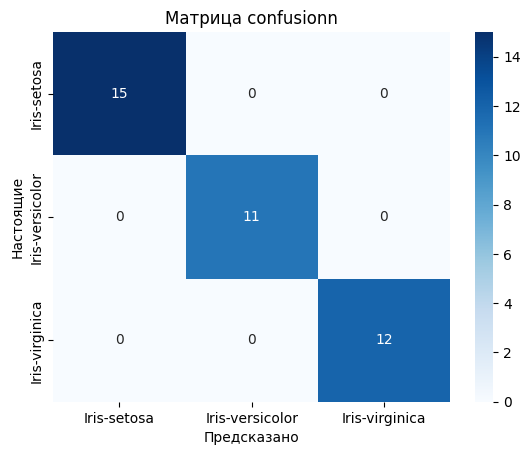

In [14]:
seaborn.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Предсказано')
plt.ylabel('Настоящие')
plt.title('Матрица confusionn')
plt.show()

Метод опорных векторов

In [15]:
y = np.argmax(y.values,axis=1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=42)
print(f"Совпадение сайзов трэйна {x_train.shape[0]==y_train.shape[0]}\nСовпадение сайзов теста {x_test.shape[0]==y_test.shape[0]}")

Совпадение сайзов трэйна True
Совпадение сайзов теста True


In [17]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#new_nodel_svm = SVC(kernel='sigmoid')#Для примера взял сигмоидное ядро
new_model_svm = SVC(kernel='sigmoid', probability=True)
ovr_svm_model = OneVsRestClassifier(new_model_svm)
ovr_svm_model.fit(x_train, y_train)
y_pred_new = ovr_svm_model.predict(x_test)

In [18]:
svm_y_pred_prob = ovr_svm_model.predict_proba(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_new)#точность покзывает насколько модель правильно классифицирует
recall_svm = recall_score(y_test, y_pred_new, average='weighted') #низкая полнота может  быть из-за несбалансированных классов, где один класс имеет большее количество объектов, чем другой
precision_svm = precision_score(y_test, y_pred_new, average='weighted')#доля истинно положительных объектов среди объектов, которые модель предсказала как положительные
f1_svm = f1_score(y_test, y_pred_new, average='weighted')#показывает как точность, так и полноту
roc_auc_svm = roc_auc_score(y_test, svm_y_pred_prob, multi_class='ovr')
# y_pred_numeric_svm = np.array([[int(val) for val in pred] for pred in y_pred_new])
# y_pred_labels_svm = np.argmax(y_pred_numeric_svm, axis=1)
# y_test_labels_svm = np.argmax(y_test.values, axis=1)
conf_matrix_svm = confusion_matrix(y_test, y_pred_new)
print(conf_matrix_svm)# Матрица ошибок показывает количество верно и ошибочно предсказанных классов


[[15  0  0]
 [ 0  8  3]
 [ 0  3  9]]


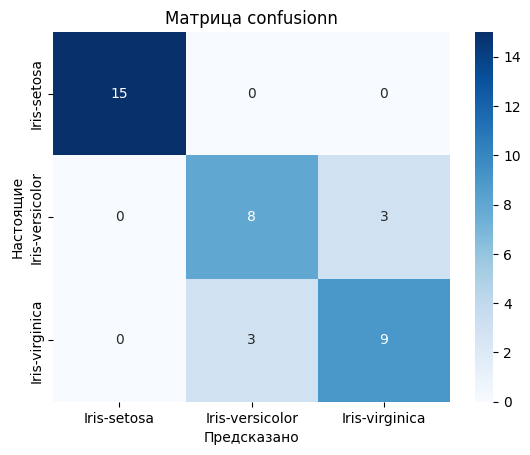

In [19]:
seaborn.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', xticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
plt.xlabel('Предсказано')
plt.ylabel('Настоящие')
plt.title('Матрица confusionn')
plt.show()

Метрики для SVM

In [20]:
print("Accuracy:", accuracy_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1-score:", f1_svm)
print("ROC-AUC:", roc_auc_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Accuracy: 0.8421052631578947
Recall: 0.8421052631578947
Precision: 0.8421052631578947
F1-score: 0.8421052631578947
ROC-AUC: 0.9780389363722698
Confusion Matrix:
[[15  0  0]
 [ 0  8  3]
 [ 0  3  9]]


Сравнение двух моделей

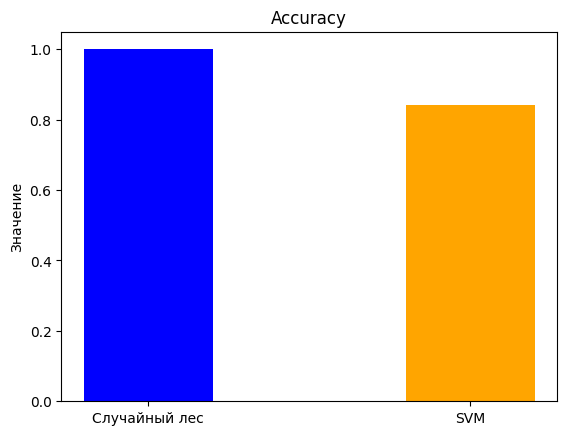

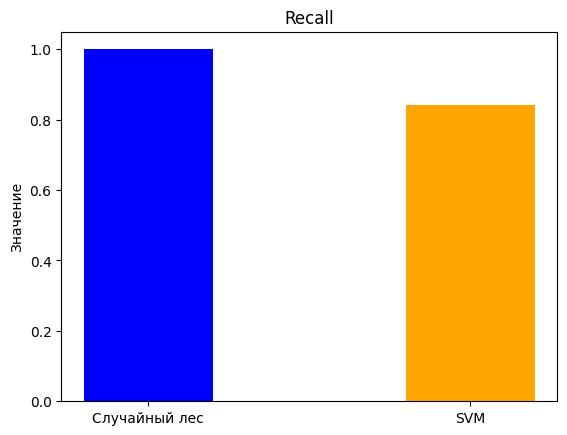

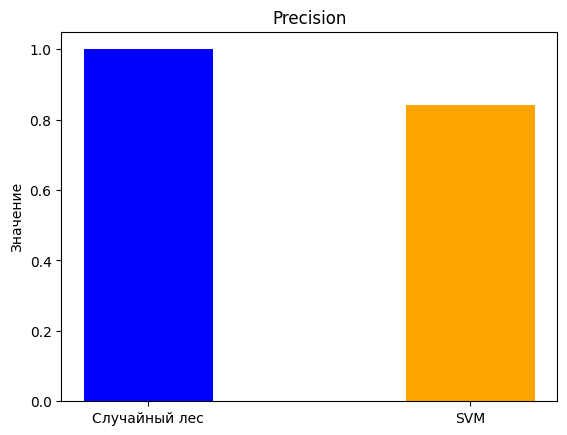

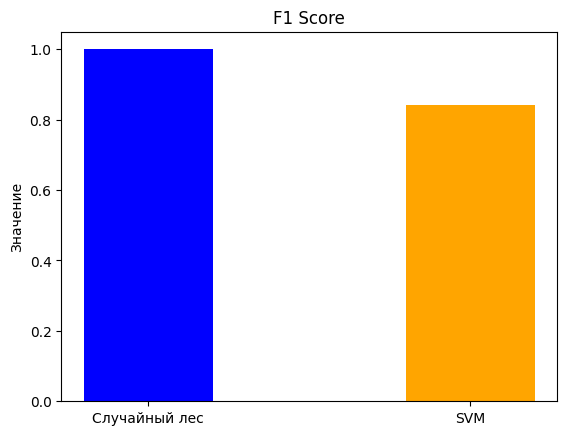

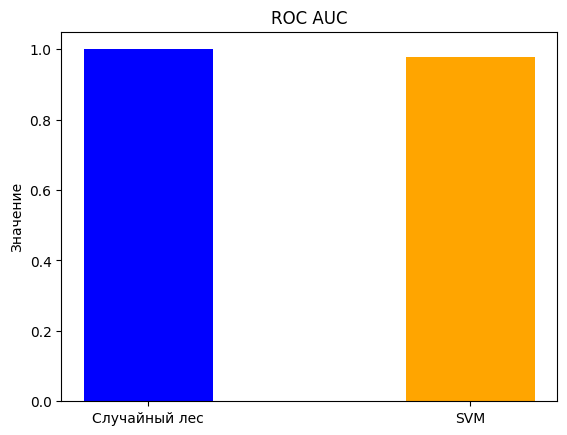

In [26]:
# [accuracy_svm, recall_svm, precision_svm, f1_svm, roc_auc_svm]
# ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC']
# [accuracy, recall, precision, f1, roc_auc]
dict_of_lbls = {
    'Accuracy':[accuracy_svm,accuracy],
    'Recall':[recall_svm,recall],
    'Precision':[precision_svm,precision],
    'F1 Score':[f1_svm,f1],
    'ROC AUC':[roc_auc_svm,roc_auc]
}
for name,metrics in dict_of_lbls.items():
  fig, ax = plt.subplots()
  bars_rf= ax.bar('Случайный лес', metrics[1], width=0.4,
                             label='Случайный лес', color='b')
  bars_svm = ax.bar('SVM', metrics[0], width=0.4, label='SVM', color='orange')
  ax.set_ylabel('Значение')
  ax.set_title(f'{name}')
  plt.show()